# Dimensionality Reduction - PCA (Principal Component Analysis)

In this notebook, we will apply PCA to reduce feature dimensionality while maintaining variance. The steps include:
1. Applying PCA to reduce feature dimensionality.
2. Determining the optimal number of principal components using the explained variance ratio.
3. Visualizing PCA results using a scatter plot and cumulative variance plot.

Deliverables:
✔️ PCA-transformed dataset
✔️ Graph showing variance retained per component

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
heart_disease_data = pd.read_csv("heart_disease_cleaned.csv")  # Updated to use the cleaned CSV file

# Separate features and target
X_scaled = heart_disease_data.iloc[:, :-1]  # All columns except the last one
y = heart_disease_data.iloc[:, -1]  # The last column

print("Cleaned data loaded successfully!")
print("Features shape:", X_scaled.shape)
print("Target shape:", y.shape)

Cleaned data loaded successfully!
Features shape: (303, 13)
Target shape: (303,)


In [4]:
# Apply PCA
print("Applying PCA...")
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_variance)

Applying PCA...
Explained variance ratio: [0.23552862 0.12286928 0.09482636 0.08459885 0.07597091 0.06794859
 0.06727791 0.05986381 0.05287958 0.04337009 0.03592682 0.03160634
 0.02733285]
Cumulative explained variance: [0.23552862 0.3583979  0.45322426 0.53782311 0.61379402 0.68174261
 0.74902052 0.80888433 0.86176391 0.90513399 0.94106081 0.97266715
 1.        ]


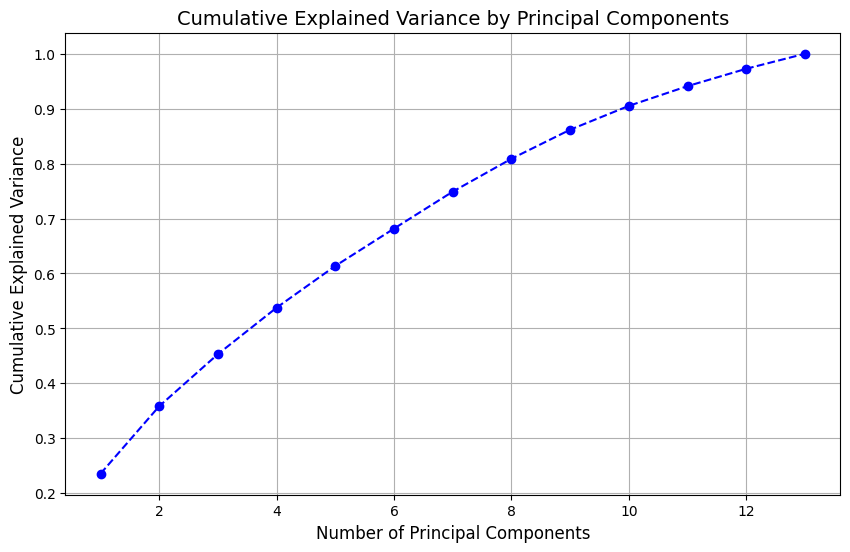

Optimal number of components to retain 95% variance: 12


In [5]:
# Determine optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.show()

# Select number of components retaining 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

In [6]:
# Transform data using optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

print("PCA transformation completed with optimal components!")
print("Shape of PCA-transformed dataset:", X_pca_optimal.shape)

PCA transformation completed with optimal components!
Shape of PCA-transformed dataset: (303, 12)


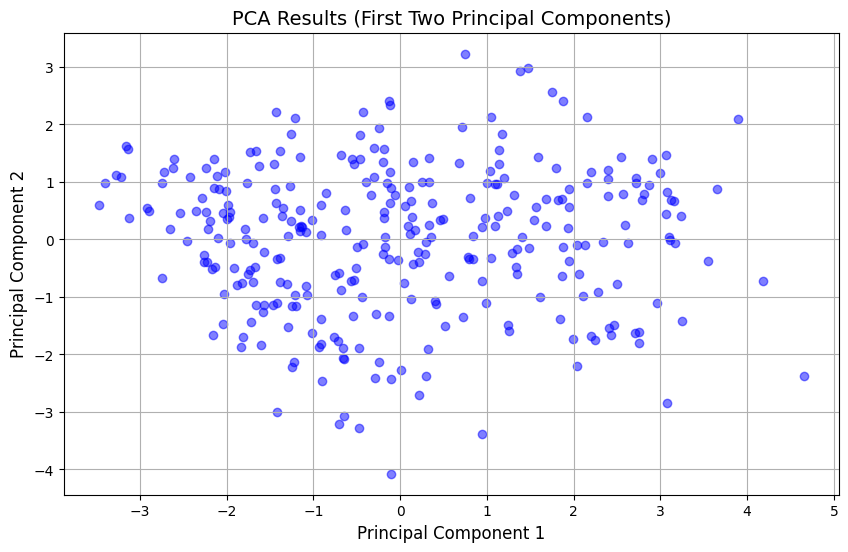

In [7]:
# Visualize PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], alpha=0.5, c='blue')
plt.title('PCA Results (First Two Principal Components)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.show()

In [8]:
# Save PCA-transformed dataset
pd.DataFrame(X_pca_optimal).to_csv("X_pca_optimal.csv", index=False)
print("PCA-transformed dataset saved successfully!")

PCA-transformed dataset saved successfully!
